## Momentum Effect

### reason
* 反应不足  （弱者恒弱）
* 正反馈模式 Herd Effect
* 反应过度 over react

### 做差法
diff
公式
$$ Momentum_t = P_t - P_{t-m} $$
$P_t$为股票t时期的价格， m为时间间隔， $P_{t-m}$ 为t-m时期的价格

In [1]:
# 价格动量的计算

import pandas as pd
import matplotlib.pyplot as plt


Vanke=pd.read_csv('part5/028/Vanke.csv')
Vanke.index=Vanke.iloc[:,1]
Vanke.index=pd.to_datetime(Vanke.index, format='%Y-%m-%d')
Vanke=Vanke.iloc[:,2:]
Vanke.head(2)


,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,8.03,8.03,8.03,8.03,0
2014-01-02,7.99,8.07,7.92,7.99,48529900


In [5]:
# 
Close=Vanke.Close
Close.describe()
# 滞后5期的close
lag5Close=Close.shift(5)
lag5Close.head()

Date
2014-01-01   NaN
2014-01-02   NaN
2014-01-03   NaN
2014-01-06   NaN
2014-01-07   NaN
Name: Close, dtype: float64

In [6]:
# 5日动量
momentum5=Close-lag5Close
momentum5.tail()

Date
2015-04-22    0.98
2015-04-23    0.46
2015-04-24   -0.25
2015-04-27    0.49
2015-04-28   -0.29
Name: Close, dtype: float64

Text(0,0.5,'Momentum5')

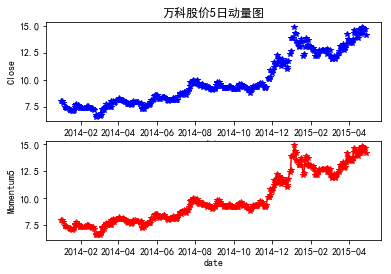

In [8]:
# close /5日动量曲线 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(211)
plt.plot(Close,'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('万科股价5日动量图')

plt.subplot(212)
plt.plot(Close,'r-*')
plt.xlabel('date')
plt.ylabel('Momentum5')


### 做除法
ROC (Rate of Change)
$$ ROC_t = \frac{P_t - P_{t-m}}{P_{t-m}}$$
equal: $ ROC_t = \frac{P_t}{P_{t-m}} -1 $

In [9]:
#divide  5日动量值
Momen5=Close/lag5Close-1
Momen5=Momen5.dropna();
Momen5[0:5]

Date
2014-01-08   -0.075965
2014-01-09   -0.066333
2014-01-10   -0.058673
2014-01-13   -0.032086
2014-01-14   -0.026918
Name: Close, dtype: float64

In [10]:
#momentum function  (diff)
def momentum(price, periond):
    lagPrice=price.shift(periond)
    momen=price-lagPrice
    momen= momen.dropna()
    return(momen)

momentum(Close, 5).tail(n=5)

Date
2015-04-22    0.98
2015-04-23    0.46
2015-04-24   -0.25
2015-04-27    0.49
2015-04-28   -0.29
Name: Close, dtype: float64

Vanke 2015, **momen35**

In [12]:
momen35=momentum(Close,35)
momen35.tail()

Date
2015-04-22    2.66
2015-04-23    2.86
2015-04-24    2.48
2015-04-27    2.48
2015-04-28    2.17
Name: Close, dtype: float64

In [19]:
# %load part5/028/candle.py
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY,date2num
from matplotlib.finance import  candlestick_ohlc
import numpy as np


def candlePlot(seriesData,title="a"):
	#设定日期格式
    Date=[date2num(date) for date in seriesData.index]
    seriesData.loc[:,'Date']=Date
    listData=[]
    for i in range(len(seriesData)):
        a=[seriesData.Date[i],\
        seriesData.Open[i],seriesData.High[i],\
        seriesData.Low[i],seriesData.Close[i]]
        listData.append(a)

	#设定绘图相关参数
    ax = plt.subplot()
    mondays = WeekdayLocator(MONDAY)
    #日期格式为‘15-Mar-09’形式
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)

	#调用candlestick_ohlc函数
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(title) #设定标题
    #设定x轴日期显示角度
    plt.setp(plt.gca().get_xticklabels(), \
    rotation=50,horizontalalignment='center')
    return(plt.show())

#蜡烛图与线图
def candleLinePlots(candleData,candleTitle='a',**kwargs):
    Date=[date2num(date) for date in candleData.index]
    candleData.loc[:,'Date']=Date
    listData=[]
    for i in range(len(candleData)):
        a=[candleData.Date[i],\
        candleData.Open[i],candleData.High[i],\
        candleData.Low[i],candleData.Close[i]]
        listData.append(a)
    
    #如果不定长参数无取值，只画蜡烛图
    ax = plt.subplot()

	#如果不定长参数有值，则分成两个子图
    flag=0

    if kwargs:
        for key in kwargs:
    #如果无参数splitFigures，则只画一个图形框
    #如果有参数splitFigures，则画出两个图形框
            if key =='splitFigures':
                ax = plt.subplot(211)
                ax2= plt.subplot(212)
                flag=1
            
            if key=='title':
                ax2.set_title(kwargs[key])
            if key=='ylabel':
                ax2.set_ylabel(kwargs[key])
            if key=='grid':
                ax2.grid(kwargs[key])
            if key =='Data':
                plt.sca(ax)
                if flag:
                    plt.sca(ax2)
                    #一维数据
                if kwargs[key].ndim==1:
                    plt.plot(kwargs[key],\
                       color='k',\
                       label=kwargs[key].name)
                    plt.legend(loc='best')
                    #二维数据有2个columns
                elif all([kwargs[key].ndim==2,\
                         len(kwargs[key].columns)==2]):
                    plt.plot(kwargs[key].iloc[:,0],\
                        linestyle='dashed',\
                        label=kwargs[key].iloc[:,0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                        linestyle='dashed',\
                        label=kwargs[key].iloc[:,1].name)
                    plt.legend(loc='best')
                    #二维数据有3个columns
                elif all([kwargs[key].ndim==2,\
                         len(kwargs[key].columns)==3]):
                    plt.plot(kwargs[key].iloc[:,0],\
                        linestyle='dashed',\
                        label=kwargs[key].iloc[:,0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                        linestyle='dashed',\
                        label=kwargs[key].iloc[:,1].name)
                    plt.bar(left=kwargs[key].iloc[:,2].index,\
                        height=kwargs[key].iloc[:,2],\
                        color='r',\
                        label=kwargs[key].iloc[:,2].name)
                    plt.legend(loc='best')


    mondays = WeekdayLocator(MONDAY)
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)
    plt.sca(ax)
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(candleTitle)
    plt.setp(ax.get_xticklabels(),\
             rotation=45,\
             horizontalalignment='center')
    #ax.autoscale_view()
    plt.show()
    return(1)

#蜡烛图与成交量柱状图
def candleVolume(seriesData,candletitle='a',bartitle='b'):
    Date=[date2num(date) for date in seriesData.index]
    seriesData.index=list(range(len(Date)))
    seriesData['Date']=Date
    listData=zip(seriesData.Date,seriesData.Open,seriesData.High,seriesData.Low,
                 seriesData.Close)
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    for ax in ax1,ax2:
        mondays = WeekdayLocator(MONDAY)
        weekFormatter = DateFormatter('%m/%d/%Y')
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(DayLocator())
        ax.xaxis.set_major_formatter(weekFormatter)
        ax.grid(True)

    ax1.set_ylim(seriesData.Low.min()-2,seriesData.High.max()+2)
    ax1.set_ylabel('蜡烛图及收盘价线')
    candlestick_ohlc(ax1,listData, width=0.7,colorup='r',colordown='g')
    plt.setp(plt.gca().get_xticklabels(),\
            rotation=45,horizontalalignment='center')
    ax1.autoscale_view()
    ax1.set_title(candletitle)
    ax1.plot(seriesData.Date,seriesData.Close,\
               color='black',label='收盘价')
    ax1.legend(loc='best')

    ax2.set_ylabel('成交量')
    ax2.set_ylim(0,seriesData.Volume.max()*3)
    ax2.bar(np.array(Date)[np.array(seriesData.Close>=seriesData.Open)]
    ,height=seriesData.iloc[:,4][np.array(seriesData.Close>=seriesData.Open)]
    ,color='r',align='center')
    ax2.bar(np.array(Date)[np.array(seriesData.Close<seriesData.Open)]
    ,height=seriesData.iloc[:,4][np.array(seriesData.Close<seriesData.Open)]
    ,color='g',align='center')
    ax2.set_title(bartitle)
    return(plt.show())

D:\Python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


D:\Python36\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


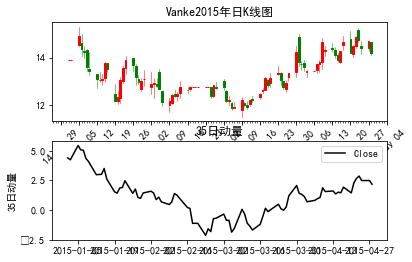

1

In [20]:
# call
# import candle
Vanke15=Vanke['2015']
candleLinePlots(Vanke['2015'],\
               candleTitle='Vanke2015年日K线图',\
               splitFigures=True,Data=momen35['2015'],\
               title='35日动量',ylabel='35日动量')

## Thinking in Momentum Trading

1. get the data (close price of stock)
2. 确定时间跨度(Period)和动量表达式(diff or divide)
3. 根据动量指标制定交易策略； 在动量指标运用上， 通常动量>0,说明还有上涨潜能，-->buy signal
instead, --> sell.
4. backtest & evaluate

** 运用动量指标进行交易

动量值的大小与时间跨度(m)有很大关系。
如何设定m。   假设m=35

> 实际上，在投资实战中，投资者会综合多种指标和形态来确定买入点和卖出点。
这里值依靠动量指标。

In [21]:
# 1. 计算动量
Close=Vanke.Close
momen35=momentum(Close,35)
momen35.head()

Date
2014-02-20   -0.71
2014-02-21   -0.83
2014-02-24   -1.15
2014-02-25   -0.91
2014-02-26   -0.75
Name: Close, dtype: float64

In [22]:
# 动量值<0时， signal=-1 sell
signal=[]
for i in momen35:
    if i>0:
        signal.append(1)
    else:
        signal.append(-1)

signal=pd.Series(signal,index=momen35.index)
signal.head()

Date
2014-02-20   -1
2014-02-21   -1
2014-02-24   -1
2014-02-25   -1
2014-02-26   -1
dtype: int64

In [50]:
# 3. 根据signal 买卖， 计算收益率
tradeSig = signal.shift(1)
ret=Close/Close.shift(1)-1
# ret=ret['2014-02-20':]
# ret.head(n=3)
Mom35Ret=(ret*(tradeSig)).dropna()
Mom35Ret[0:5]

Date
2014-02-21    0.021858
2014-02-24    0.065642
2014-02-25    0.017937
2014-02-26   -0.016743
2014-02-27    0.013473
dtype: float64

In [49]:
# 策略评价
# 计算交易指标获胜率
# real_Mom35Ret=Mom35Ret[Mom35Ret!=0]
# real_ret=ret[ret!=0]
# real_ret.head()
import numpy as np
Mom35Ret[Mom35Ret==np.NaN] = 0
win=Mom35Ret[Mom35Ret>0]
# print(len(win))
winrate=len(win)/len(Mom35Ret[Mom35Ret!=0])
winrate

0.5211267605633803

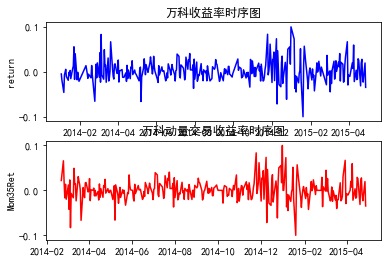

In [26]:
# 绘制股票收益率与动量指标交易策略收益率的时序图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(2,1,1)
plt.plot(real_ret,'b')
plt.ylabel('return')
plt.title('万科收益率时序图')

plt.subplot(2,1,2)
plt.plot(Mom35Ret,'r')
plt.ylabel('Mom35Ret')
plt.title('万科动量交易收益率时序图')
plt.show()

Text(0.5,1,'损失直方图')

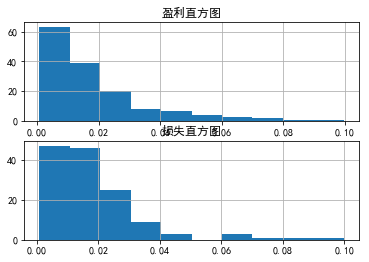

In [29]:
# loss
loss=-Mom35Ret[Mom35Ret<0]
plt.subplot(2,1,1)
win.hist()
plt.title("盈利直方图")

plt.subplot(2,1,2)
loss.hist()
plt.title("损失直方图")

In [31]:
# 计算两种收益率的mean和分位数值
performance=pd.DataFrame({"win":win.describe(),\
"loss":loss.describe()})
performance

,loss,win
count,136.000000,148.000000
mean,0.018514,0.018646
std,0.015860,0.018261
min,0.000805,0.000769
25%,0.008214,0.005472
50%,0.015996,0.013444
75%,0.022360,0.024786
max,0.099852,0.099684
